In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jan-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-jan-2021/train.csv
/kaggle/input/tabular-playground-series-jan-2021/test.csv


# Common Import statements

In [2]:
#other imports
import matplotlib.pyplot as plt

In [3]:
#model utility methods imported from sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_squared_error
import sklearn
sklearn.set_config(display="diagram")

In [4]:
#trying 3 models
# 1. Linear regression
# 2. Decission tree regression
# 3. Random Forrest reggression

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Reading data

In [5]:
def get_data(path, index):
    return pd.read_csv(path, index_col=index)

train_set = get_data('/kaggle/input/tabular-playground-series-jan-2021/train.csv', 'id')
test_set = get_data('/kaggle/input/tabular-playground-series-jan-2021/test.csv', 'id')

# Exploring data

In [6]:
train_set.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
id,,,,,,,,,,,,,,,
1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


1. 14 attributes and 1 label to predict
2. Already there is a index column


In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 1 to 499999
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cont1   300000 non-null  float64
 1   cont2   300000 non-null  float64
 2   cont3   300000 non-null  float64
 3   cont4   300000 non-null  float64
 4   cont5   300000 non-null  float64
 5   cont6   300000 non-null  float64
 6   cont7   300000 non-null  float64
 7   cont8   300000 non-null  float64
 8   cont9   300000 non-null  float64
 9   cont10  300000 non-null  float64
 10  cont11  300000 non-null  float64
 11  cont12  300000 non-null  float64
 12  cont13  300000 non-null  float64
 13  cont14  300000 non-null  float64
 14  target  300000 non-null  float64
dtypes: float64(15)
memory usage: 36.6 MB


All values are present and 3 lakh records are present (which is a sizeable set)

In [8]:
train_set.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661
std,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071
min,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000
25%,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367
50%,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571
75%,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084
max,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569


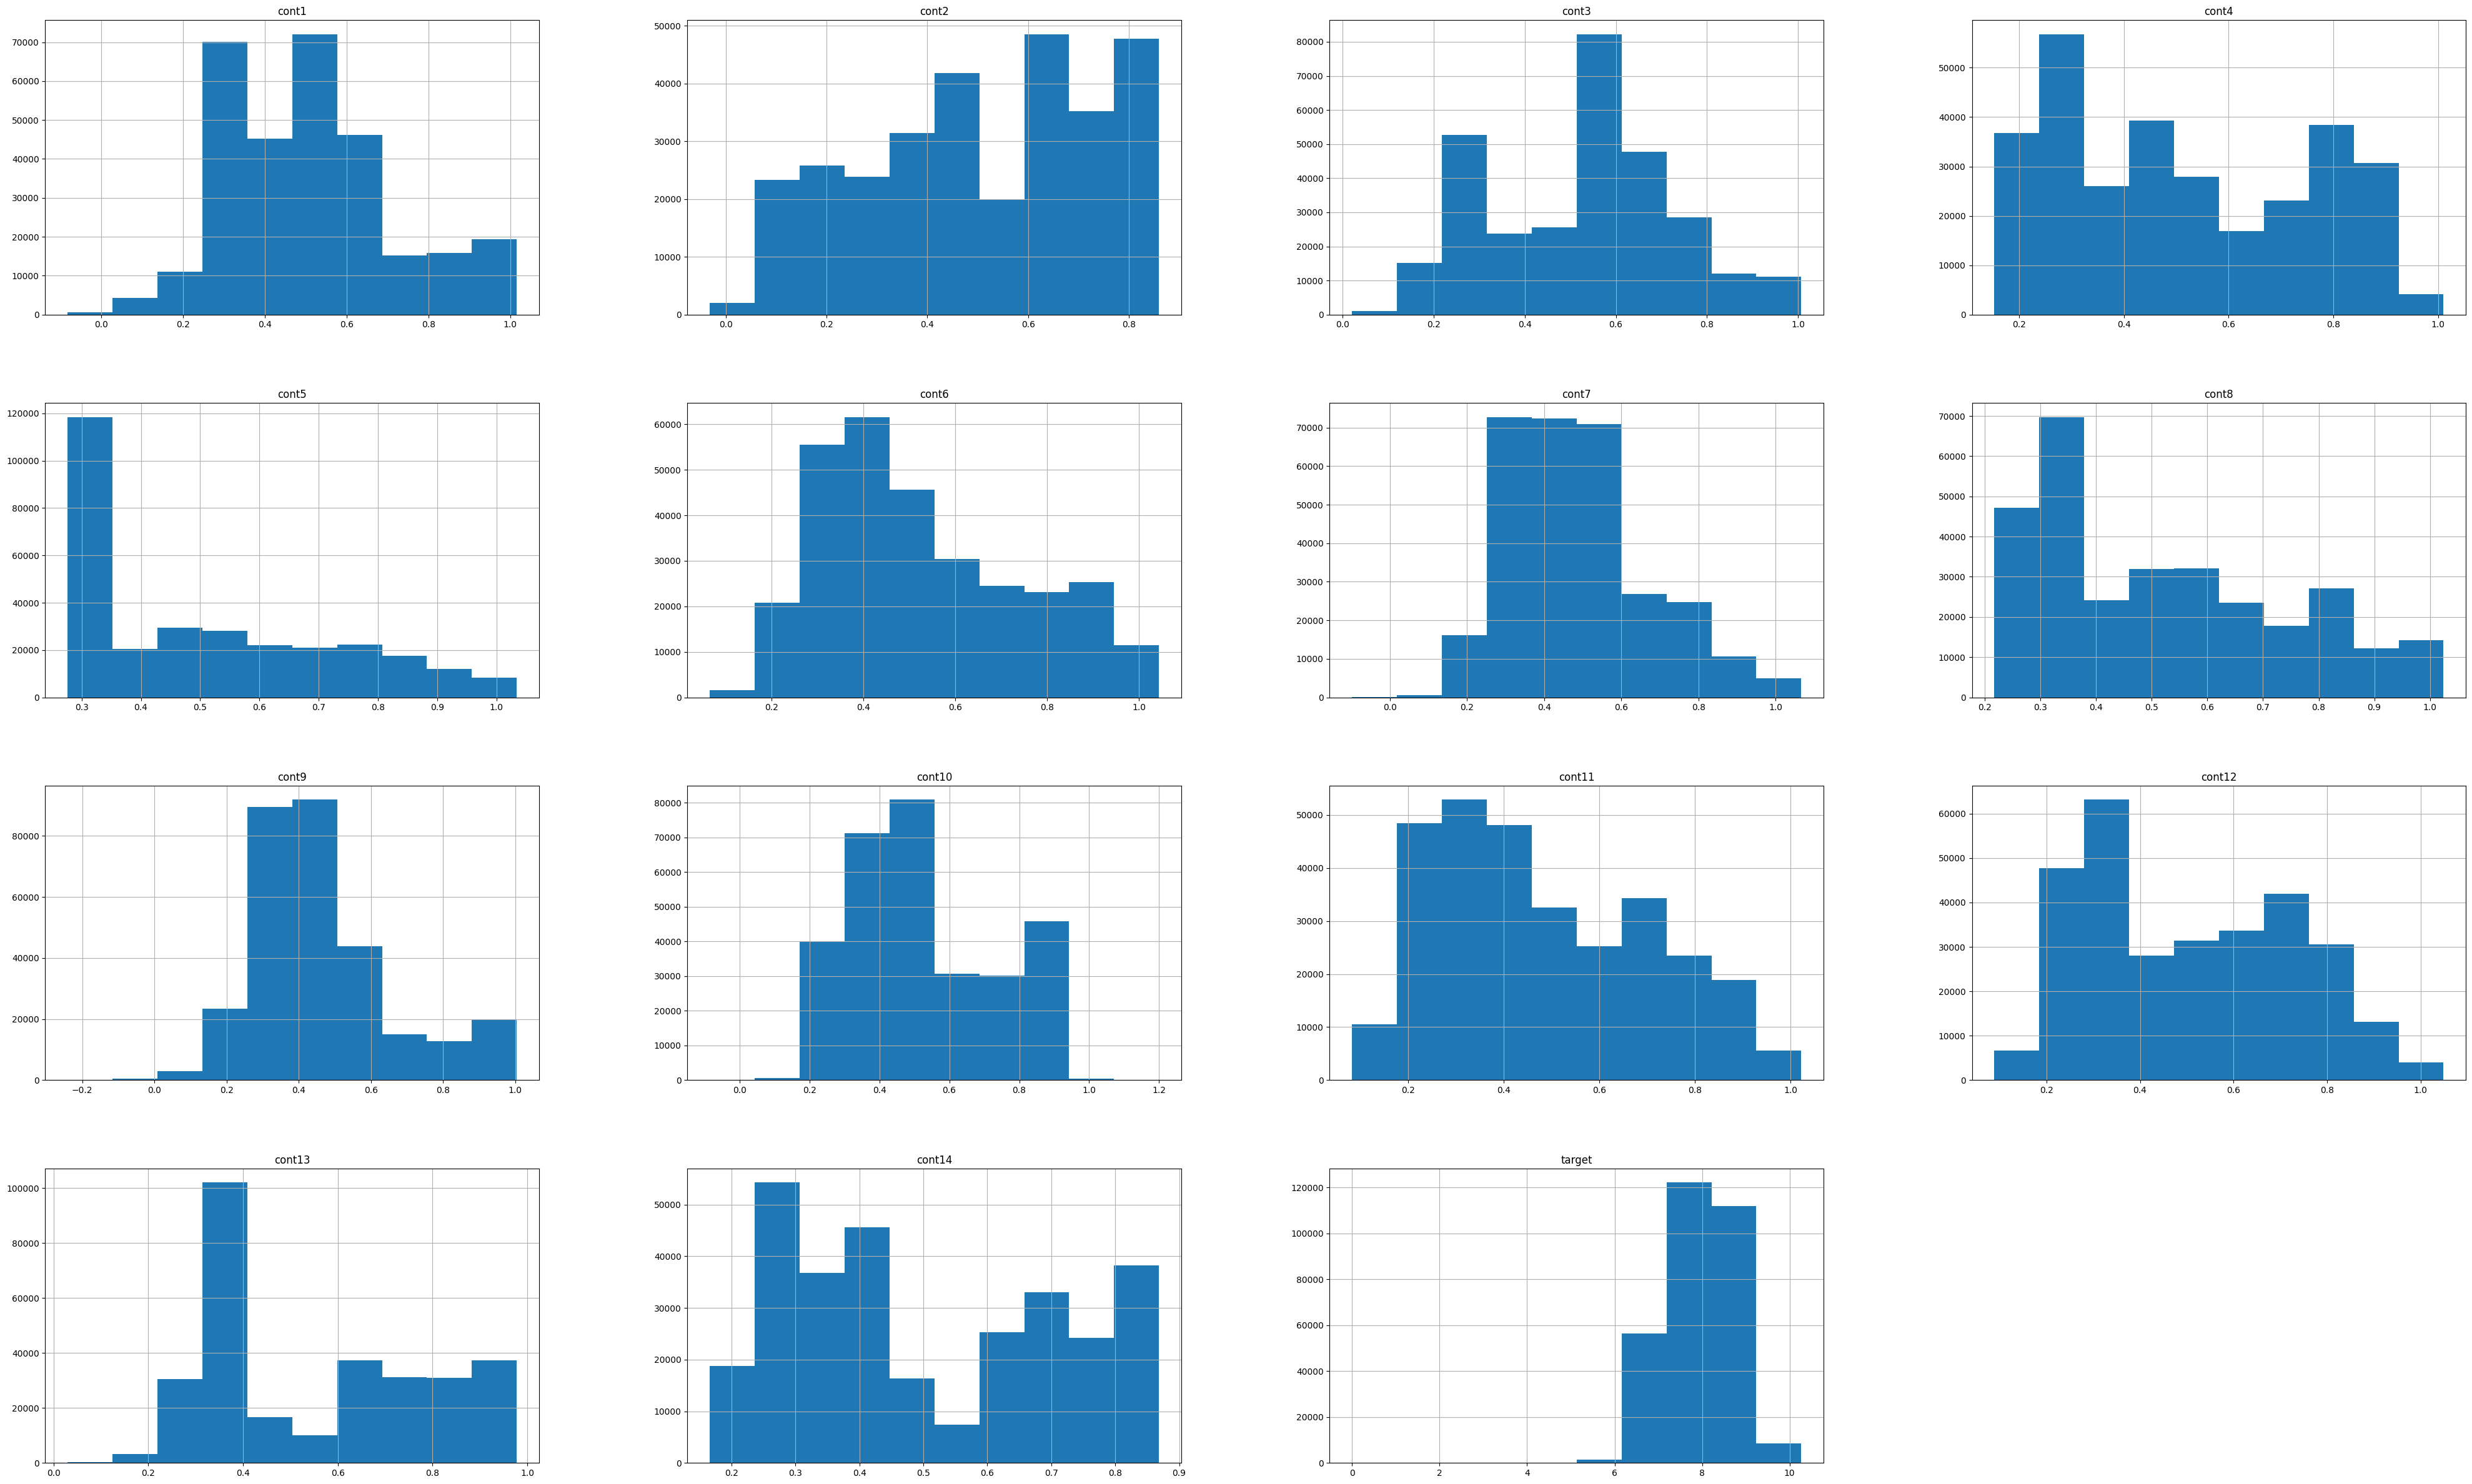

In [9]:
train_set.hist(bins=10, grid=True, figsize=[50, 30])
plt.show()

In [10]:
# 2. attempt to identify the tail heavy, multi mode charts
# tail heavy = count7 and count9
# head heavy = count5, count8
# multi mode = count1, count2, count3, count4, count6, count10, count11, count12, count13, count14

# Finding corelations

In [11]:
corr_matrix = train_set.corr()

In [12]:
corr_matrix['target']

cont1    -0.032994
cont2     0.067102
cont3     0.058936
cont4     0.005522
cont5    -0.005358
cont6     0.027955
cont7     0.067234
cont8     0.014698
cont9    -0.013029
cont10   -0.021143
cont11    0.050996
cont12    0.047809
cont13   -0.006642
cont14   -0.006609
target    1.000000
Name: target, dtype: float64

> Looks like 'cont4', 'cont5', 'cont13', 'cont14' are less corelated

# Splitting data for feeding this to ml model

In [13]:
train_set_for_model, test_set_for_model = train_test_split(train_set, test_size=0.1, random_state=42)

# Creating a pipeline to preprocess the incoming data

In [14]:
# 1. first attempt
def drop_non_corr(df):
    return df

#2. second attempt 
log_transformer = FunctionTransformer(np.log1p, validate=True) 

log_columns = ['cont7', 'cont9', 'cont5', 'cont8'] #tail and head heavy
remove_non_corr_col = FunctionTransformer(drop_non_corr)

preprocessing = ColumnTransformer(transformers=[
    ('cleanup_non_corr_col', remove_non_corr_col, ['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8','cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14']),
    ('tail_head_heavy_col', log_transformer, log_columns)
])


# Selecting Model

In [15]:
lr_model = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('linear_regression', LinearRegression())
])

dt_model = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('decision_tree', DecisionTreeRegressor(random_state=42))
])

rf_model = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('random_forest', RandomForestRegressor(random_state=42))
])

In [16]:
target = train_set_for_model['target']
data = train_set_for_model.drop(columns=['target'], axis=1)

# Training model

In [17]:
lr_model.fit(data, target)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cleanup_non_corr_col',
                                                  FunctionTransformer(func=<function drop_non_corr at 0x781389b69000>),
                                                  ['cont1', 'cont2', 'cont3',
                                                   'cont4', 'cont5', 'cont6',
                                                   'cont7', 'cont8', 'cont9',
                                                   'cont10', 'cont11', 'cont12',
                                                   'cont13', 'cont14']),
                                                 ('tail_head_heavy_col',
                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                      validate=True),
                                                  ['cont7', 'cont9', 'cont5',
                                                   'cont8'])])),
                ('linear_regression', LinearRegression())])

In [18]:
dt_model.fit(data, target)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cleanup_non_corr_col',
                                                  FunctionTransformer(func=<function drop_non_corr at 0x781389b69000>),
                                                  ['cont1', 'cont2', 'cont3',
                                                   'cont4', 'cont5', 'cont6',
                                                   'cont7', 'cont8', 'cont9',
                                                   'cont10', 'cont11', 'cont12',
                                                   'cont13', 'cont14']),
                                                 ('tail_head_heavy_col',
                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                      validate=True),
                                                  ['cont7', 'cont9', 'cont5',
                                                   'cont8'])])),
                ('decision_tree', DecisionTreeRegressor(random_state=42))])

In [19]:
rf_model.fit(data, target)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cleanup_non_corr_col',
                                                  FunctionTransformer(func=<function drop_non_corr at 0x781389b69000>),
                                                  ['cont1', 'cont2', 'cont3',
                                                   'cont4', 'cont5', 'cont6',
                                                   'cont7', 'cont8', 'cont9',
                                                   'cont10', 'cont11', 'cont12',
                                                   'cont13', 'cont14']),
                                                 ('tail_head_heavy_col',
                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                      validate=True),
                                                  ['cont7', 'cont9', 'cont5',
                                                   'cont8'])])),
                ('random_forest', RandomForestRegressor(random_state=42))])

# Predictions by all models

In [20]:
test_target = test_set_for_model['target']
test_data = test_set_for_model.drop(columns=['target'], axis=1)

In [21]:
lr_pred = lr_model.predict(test_data)

In [22]:
dt_pred = dt_model.predict(test_data)

In [23]:
rf_pred = rf_model.predict(test_data)

# RMSE scores of all model predictions

In [24]:
lr_rmse = mean_squared_error(test_target, lr_pred, squared=False)
lr_rmse

0.722073378322866

In [25]:
dt_rmse = mean_squared_error(test_target, dt_pred, squared=False)
dt_rmse

1.004476599204003

In [26]:
rf_rmse = mean_squared_error(test_target, rf_pred, squared=False)
rf_rmse

0.7044242042339245

# As a initial call going with best fit model

In [27]:
rf_submission_pred = rf_model.predict(test_set)

In [28]:
lr_submission_pred = lr_model.predict(test_set)

In [29]:
dt_submission_pred = dt_model.predict(test_set)

In [30]:
rf_submission = pd.DataFrame(columns=["target"])
rf_submission["id"] = test_set.index
rf_submission["target"] = rf_submission_pred
rf_submission.set_index('id', inplace=True)
rf_submission.to_csv('submission_rf.csv')

In [31]:
lr_submission = pd.DataFrame(columns=["target"])
lr_submission["id"] = test_set.index
lr_submission["target"] = lr_submission_pred
lr_submission.set_index('id', inplace=True)
lr_submission.to_csv('submission_lr.csv')

In [32]:
dt_submission = pd.DataFrame(columns=["target"])
dt_submission["id"] = test_set.index
dt_submission["target"] = dt_submission_pred
dt_submission.set_index('id', inplace=True)
dt_submission.to_csv('submission_dt.csv')